## **DATA 620 Final Project**


In [1]:
import pandas as pd

In [2]:
import pandas as pd
import re
import datetime as dt
import os
import math

In [3]:
import requests

In [4]:
from bs4 import BeautifulSoup

In [45]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.util import ngrams
from nltk.stem import WordNetLemmatizer

In [109]:
import networkx as net
from networkx.algorithms import bipartite
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from statistics import mean
import os.path
from plotnine import *

In [46]:
nltk.download('stopwords')   
nltk.download('wordnet')

wordnet_lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/korymartin/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/korymartin/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


### **E. Ballot initiative text**

This is focused on importing the data for the corpus representing the different ballot initiatives. 

1. Generate corpus of multiple documents pertaining to different ballot initiatives
2. For each ballot initiative we will collect multiple texts sources and then we will create a master word corpus that 

Final Data structure:
- Ballot initiative
- Words
- Score words

Based on current data, there are 68 unique ballot measures over the course of several years. Particularly for State elections, it's possible to have repeats of ballot initiatives, therefore the search has to be by year and by ballot measure. The state site has a summary of their ballot information. 

I want to write a scraper to pull text pertaining to the ballot initiatives from the official state ballot

Man want to incorporate some form of categorical tagging to the text as well. Identifying ballot measures as being tied to education, health care, gun rights, etc.

Pre-processing:
- convert text to lower - COMPLETE
- remove punctuation and special characters - COMPLETE
- remove stop words - COMPLETE
- do some lemmization
- maybe incorporate bigrams - COMPLETE

Use this as the basis for building official text scraper

voter information guide - https://vigarchive.sos.ca.gov/

#### **Web Scraper for Data**

Main sources:

Successfully created scrapers:

1. Secretary of State - https://vigarchive.sos.ca.gov/ - SUCCESS
2. Legislative Analysts' Office - https://lao.ca.gov/BallotAnalysis - SUCCESS
3. UC San Francisco Law School - https://repository.uclawsf.edu/ca_ballot_props/ - SUCCESS
4. Wikepedia - https://en.wikipedia.org/wiki/List_of_California_ballot_propositions - SUCCESS
5. League of Women Voters - https://cavotes.org/ballot-measures/ - SUCCESS

Unsuccessfuly created scrapers:

1. https://ballotpedia.org/List_of_California_ballot_propositions
2. https://voterguide.sos.ca.gov/propositions/

The final dataframe should have the following structure:
- Source Name
- Source Link
- Election Year / Date
- Identifier (STATE MEASURE PROP_NUMBER)
- Measure Name
- Abstract / Summary Text

#### 1. Voter Guide Archive

In [ ]:
#Get the main links and info


main_url = 'https://vigarchive.sos.ca.gov/'
data = requests.get(main_url)

html = BeautifulSoup(data.text,'html.parser')
main_content = html.find(id="mainCont")
li_tags = main_content.find('ul').find_all('li')

prop_info = []

for i in li_tags:
    href = i.find('a')['href']
    election_title = i.text
    new_url=main_url+href
    
    mini_dict={'new_url':new_url, 'election_title':election_title}
    prop_info.append(mini_dict)



In [ ]:
prop_info

[{'new_url': 'https://vigarchive.sos.ca.gov/2022/general/',
  'election_title': '2022 California General Election'},
 {'new_url': 'https://vigarchive.sos.ca.gov/2022/',
  'election_title': '2022 California Primary Election'},
 {'new_url': 'https://vigarchive.sos.ca.gov/2021/',
  'election_title': '2021 California Recall Election'},
 {'new_url': 'https://vigarchive.sos.ca.gov/2020/primary/',
  'election_title': '2020 California Primary Election'},
 {'new_url': 'https://vigarchive.sos.ca.gov/2018/primary/',
  'election_title': '2018 California Primary Election'},
 {'new_url': 'https://vigarchive.sos.ca.gov/2018/general/',
  'election_title': '2018 California General Election'},
 {'new_url': 'https://vigarchive.sos.ca.gov/2016/general/',
  'election_title': '2016 California General Election'},
 {'new_url': 'https://vigarchive.sos.ca.gov/2016/primary/',
  'election_title': '2016 California Primary Election'},
 {'new_url': 'https://vigarchive.sos.ca.gov/2014/general/',
  'election_title': '

In [ ]:

# Get the links for each of the individual elections

prop_links = []

for prop in prop_info:

    url = prop['new_url']
    data = requests.get(url)
    new_html = BeautifulSoup(data.text,'html.parser')
    if new_html.find(id='mainNavCtnr'):
        main_nav = new_html.find_all(id="mainNavCtnr")
    else:
        main_nav = new_html.find_all(id="globalLinks")
    
    if main_nav:
        li_tags = main_nav[0].find_all('li')
        
        
        
        for li in li_tags:
            
            if li.text =='Propositions':
                href = li.find('a')['href']
                #prop_links.append(href)
                prop['prop_group_url'] = main_url[:-1]+href
                prop_links.append(prop)
                print(href)
                

#prop_links

#Get links for each of the individual props

#new_links = [main_url[:-1]+link for link in prop_links]


/2022/general/propositions/
/2020/primary/propositions/
/2018/primary/propositions/
/2018/general/propositions/
/2016/general/en/propositions/
/2014/general/en/propositions/
/2014/primary/propositions/
/2012/general/propositions/


In [ ]:
prop_links

[{'new_url': 'https://vigarchive.sos.ca.gov/2022/general/',
  'election_title': '2022 California General Election',
  'prop_group_url': 'https://vigarchive.sos.ca.gov/2022/general/propositions/'},
 {'new_url': 'https://vigarchive.sos.ca.gov/2020/primary/',
  'election_title': '2020 California Primary Election',
  'prop_group_url': 'https://vigarchive.sos.ca.gov/2020/primary/propositions/'},
 {'new_url': 'https://vigarchive.sos.ca.gov/2018/primary/',
  'election_title': '2018 California Primary Election',
  'prop_group_url': 'https://vigarchive.sos.ca.gov/2018/primary/propositions/'},
 {'new_url': 'https://vigarchive.sos.ca.gov/2018/general/',
  'election_title': '2018 California General Election',
  'prop_group_url': 'https://vigarchive.sos.ca.gov/2018/general/propositions/'},
 {'new_url': 'https://vigarchive.sos.ca.gov/2016/general/',
  'election_title': '2016 California General Election',
  'prop_group_url': 'https://vigarchive.sos.ca.gov/2016/general/en/propositions/'},
 {'new_url':

In [ ]:

new_prop_info = []

for item in prop_links:

    data = requests.get(item['prop_group_url'])
    html = BeautifulSoup(data.text,'html.parser')
    li_content = html.find('ol').find_all('li')[2].contents
    for i in li_content:
        result = re.findall('[\w]+.\d{1,2},.\d{4}',i.text)
        if len(result) > 0:
            election_date = result[0]
    if len(html.find_all(id='mainCont')) > 0:
        main_content = html.find_all(id='mainCont')[0]
    else:
        main_content = html.find_all(id='content')[0]
    prop_sub_links = main_content.find_all('ul')[0].find_all('li')

    #print(prop_sub_links)



    for prop_item in prop_sub_links:
        new_url = main_url[:-1]+prop_item.find('a')['href']
        #print(new_url)

        if len(re.findall('.gov\/[\d]{4}\/[\w]+', new_url)) > 0:
            mini_dict = {}
            title = prop_item.text

            mini_dict['prop_name'] = title
            mini_dict['election_date'] = election_date
            mini_dict['prop_url'] = new_url
            #mini_dict = {'new_url':new_url,'title':title, 'election_date':election_date}
            new_prop_info.append(mini_dict)
#prop_info
#prop_text = []


#Get deailed information for each prop


In [ ]:
new_prop_info[0]

{'prop_name': '1 Constitutional Right to Reproductive Freedom. Legislative Constitutional Amendment. ',
 'election_date': 'November 8, 2022',
 'prop_url': 'https://vigarchive.sos.ca.gov/2022/general/propositions/1/'}

In [ ]:

prop_details = []

for item in new_prop_info:


    data =requests.get(item['prop_url'])
    html = BeautifulSoup(data.text,'html.parser')
    if html.find_all('aside')[0].find(id='propSubpages'):
        href = html.find_all('aside')[0].find(id='propSubpages').find_all('li')[0].find('a')['href']
        new_url = main_url[:-1]+href
        data = requests.get(new_url)
        html = BeautifulSoup(data.text,'html.parser')
        if re.findall('.gov\/2012',item['prop_url']):
            top = html.find_all(id='content')
            prop_title = top[0].find_all('div')[2].find(class_='propName').text
            summary_text = top[0].find_all('ul')[1].find_all('li')

            for summary in summary_text:
                    mini_dict = {}
                    mini_dict['prop_title'] = prop_title
                    mini_dict['prop_name'] = item['prop_name']
                    mini_dict['election_date'] = item['election_date']
                    mini_dict['prop_summary'] = summary.text
                    prop_details.append(mini_dict)
        else:
            top = html.find_all(id='top')
            if len(top) > 0:
                prop_title = top[0].find_all(id='mainCont')[0].find_all('div')[2].find(class_='propName').text
                summary_text = top[0].find_all(id='mainCont')[0].find_all('ul')[1].find_all('li')

                for summary in summary_text:
                    mini_dict = {}
                    mini_dict['prop_title'] = prop_title
                    mini_dict['prop_name'] = item['prop_name']
                    mini_dict['election_date'] = item['election_date']
                    mini_dict['prop_summary'] = summary.text
                    prop_details.append(item)

    

In [ ]:
#Create dataframe for the prop details

df1 = pd.DataFrame(prop_details)

In [ ]:
df1.head()
df1['source_url'] = main_url
df1['source'] = 'California Secretary of State'

#### 2. Voter Guide Current - GETTING TIMEOUT ERROR TRY AGAIN LATER

In [ ]:
main_url

'https://vigarchive.sos.ca.gov/'

In [ ]:
main_url = 'https://voterguide.sos.ca.gov/propositions/1/'
data = requests.get(main_url)


SSLError: HTTPSConnectionPool(host='voterguide.sos.ca.gov', port=443): Max retries exceeded with url: /propositions/1/ (Caused by SSLError(SSLCertVerificationError(1, '[SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: unable to get local issuer certificate (_ssl.c:1006)')))

In [ ]:

 
html = BeautifulSoup(data.text,'html.parser')

'''
if html.find_all('aside')[0].find(id='propSubpages'):
    href = html.find_all('aside')[0].find(id='propSubpages').find_all('li')[0].find('a')['href']
    new_url = main_url[:-1]+href
    data = requests.get(new_url)
    html = BeautifulSoup(data.text,'html.parser')
    if re.findall('.gov\/2012',item['new_url']):
        top = html.find_all(id='content')
        bond_title = top[0].find_all('div')[2].find(class_='propName').text
        summary_text = top[0].find_all('ul')[1].find_all('li')

        for summary in summary_text:
                mini_dict = {}
                mini_dict['bond_title'] = bond_title
                mini_dict['summary'] = summary.text
                prop_text.append(mini_dict)
    else:
        top = html.find_all(id='top')
        if len(top) > 0:
            bond_title = top[0].find_all(id='mainCont')[0].find_all('div')[2].find(class_='propName').text
            summary_text = top[0].find_all(id='mainCont')[0].find_all('ul')[1].find_all('li')

            for summary in summary_text:
                mini_dict = {}
                mini_dict['bond_title'] = bond_title
                mini_dict['summary'] = summary.text
                prop_text.append(mini_dict)
'''

#### 3. Legislative Analyst's Office

In [ ]:
prop_summary_df = []

main_url = 'https://lao.ca.gov/BallotAnalysis/Propositions?date=12%2F31%2F9999&propNumber=&searchTerm='
data = requests.get(main_url)
html = BeautifulSoup(data.text, 'html.parser')
container = html.find(class_='container')
prop_info = container.find(class_='row').find_all(class_='col-md-6')[0].find_all(class_='well')

for prop in prop_info:
    
    prop_name = prop.contents[1].text
    election_date = prop.contents[3].text.strip()
    prop_desc = prop.contents[6].text.title()
    prop_summary = prop.contents[8].find_all('p')

    for item in prop_summary:
        mini_dict = {}
        mini_dict['election_date'] = election_date
        mini_dict['prop_name'] = prop_name
        mini_dict['prop_desc'] = prop_desc
        mini_dict['prop_summary'] = item.text
        prop_summary_df.append(mini_dict)
    

In [ ]:
df2 = pd.DataFrame(prop_summary_df)

In [ ]:
df2['source_url'] = 'https://lao.ca.gov/BallotAnalysis/'
df2['source'] = 'Legislative Analysts Office'

In [ ]:
df2

,election_date,prop_name,prop_desc,prop_summary,source_url,source
0,"March 5, 2024",Proposition 1,Authorizes $6.38 Billion In Bonds To Build Men...,A YES vote on this measure means: Counties wou...,https://lao.ca.gov/BallotAnalysis/,Legislative Analysts Office
1,"March 5, 2024",Proposition 1,Authorizes $6.38 Billion In Bonds To Build Men...,A NO vote on this measure means: Counties woul...,https://lao.ca.gov/BallotAnalysis/,Legislative Analysts Office
2,"March 5, 2024",Proposition 1,Authorizes $6.38 Billion In Bonds To Build Men...,"To get a better understanding of bond debt, se...",https://lao.ca.gov/BallotAnalysis/,Legislative Analysts Office
3,"November 8, 2022",Proposition 1,Constitutional Right To Reproductive Freedom. ...,A YES vote on this measure means: The Californ...,https://lao.ca.gov/BallotAnalysis/,Legislative Analysts Office
4,"November 8, 2022",Proposition 1,Constitutional Right To Reproductive Freedom. ...,A NO vote on this measure means: The Californi...,https://lao.ca.gov/BallotAnalysis/,Legislative Analysts Office
...,...,...,...,...,...,...
115,"November 8, 2016",Proposition 67,Referendum To Overturn Ban On Single-Use Plast...,A YES vote on this measure means: Most grocery...,https://lao.ca.gov/BallotAnalysis/,Legislative Analysts Office
116,"November 8, 2016",Proposition 67,Referendum To Overturn Ban On Single-Use Plast...,\r\nA NO vote on this measure means: Stores co...,https://lao.ca.gov/BallotAnalysis/,Legislative Analysts Office
117,"June 7, 2016",Proposition 50,"Sca 17 (Resolution Chapter 127, Statutes Of 20...",A YES vote on this measure means: The State Co...,https://lao.ca.gov/BallotAnalysis/,Legislative Analysts Office
118,"June 7, 2016",Proposition 50,"Sca 17 (Resolution Chapter 127, Statutes Of 20...",A NO vote on this measure means: The Senate or...,https://lao.ca.gov/BallotAnalysis/,Legislative Analysts Office


#### 4. Ballotpedia - UNABLE TO FIGURE OUT HOW TO NAVIGATE THE SITE

In [ ]:
main_url = 'https://ballotpedia.org/California_2022_ballot_propositions'
data = requests.get(main_url)
html = BeautifulSoup(data.text, 'html.parser')

In [ ]:
table = html.select('div#contentwrapper')[0].select('div.row')[0].select('div.mw-body')[0].select('table.bptable blue')

In [ ]:
table

[]

#### 5. League of Women Voters

In [ ]:
re.findall('\d{4}.[\bGeneral\b|\bPrimary\b]+',' 2018 General')

['2018 General']

In [ ]:
 re.findall('\d{4}.[\bGeneral\b|\bPrimary\b]+','2022 Primary')

['2022 Primary']

In [ ]:
html_content

[<strong>Measure ID:</strong>,
 '\xa0Proposition 4',
 <br/>,
 <strong>Measure Name: </strong>,
 'Authorizes bonds funding construction at hospitals providing children’s health care.',
 <br/>,
 <strong>Type of Ballot Measure:</strong>,
 '\xa0Initiative Statute',
 <br/>,
 <strong>Election:</strong>,
 ' 2018 General',
 <br/>]

In [ ]:
base_url = 'https://cavotes.org'
main_url = 'https://cavotes.org/ballot-measures/'
data = requests.get(main_url)
html = BeautifulSoup(data.text, 'html.parser')
li_tags = html.find_all('li')
slugs = []

for li in li_tags:
    a_tag = li.find('a',attrs={'href':True})
    if a_tag:
    
        href= a_tag['href']
        match_result = re.search('ballot-measure\/[\d]{4}',href)
        if match_result:
            #print(href)
            slugs.append(href)
prop_info = []

for slug in slugs:

    new_url = base_url+slug
    data = requests.get(new_url)
    html = BeautifulSoup(data.text,'html.parser')
    prop_num = html.find_all(class_='wp-block-details')[0].find_all('p')[0].contents[1].strip()
    prop_name =html.find_all(class_='wp-block-details')[0].find_all('p')[0].contents[4]
    #prop_election = html.find_all(class_='wp-block-details')[0].find_all('p')[0].contents[10].strip()
    html_content = html.find_all(class_='wp-block-details')[0].find_all('p')[0].contents
    #print(html_content)
    for i in html_content:    
        if len(re.findall('\d{4}.[\bGeneral\b|\bPrimary\b]+',i.text.strip())) > 0:
            prop_election = i.text.strip()
            #print(prop_election, new_url)
        else:
            #print(i.text, new_url)
            prop_election = None
    #print(prop_election, new_url,'\n\n')
    measure_question = list(html.find_all(class_='wp-block-heading')[1].next_siblings)[1].text

    li_tags = html.find_all(class_='entry-content')[0].find_all('ul')[0].find_all('li')
    for li in li_tags:
        mini_dict = {}
        mini_dict['prop_num'] = prop_num
        mini_dict['prop_name'] = prop_name
        mini_dict['prop_election'] = prop_election
        mini_dict['measure_question'] = measure_question
        mini_dict['summary_text'] = li.text
        prop_info.append(mini_dict)

df3 = pd.DataFrame(prop_info)

df3['source_url'] = 'https://cavotes.org'
df3['source'] = 'League of Women Voters'

#### 6. Wikepedia

In [ ]:
main_urls = ['https://en.wikipedia.org/wiki/List_of_California_ballot_propositions:_2010%E2%80%932019',\
             'https://en.wikipedia.org/wiki/List_of_California_ballot_propositions:_2020%E2%80%932029']

prop_info = []

data = requests.get(main_urls[0])
html = BeautifulSoup(data.text,'html.parser')

tables = html.find_all(class_='wikitable')

for table in tables: #html.find_all(class_='wikitable')[9].find_all('tr')[1:]
    tr = table.find_all('tr')[1:]

    for i in tr:
        if len(i.find_all(class_='mw-redirect')):
            mini_dict = {}
            prop_title = i.find('a')['title']
            prop_link = i.find('a')['href']
            prop_desc = i.find_all('td')[2].text
            mini_dict['prop_title'] = prop_title
            mini_dict['prop_link'] = prop_link
            mini_dict['prop_desc'] = prop_desc
            prop_info.append(mini_dict)
            #print(mini_dict)
            '''
            td = row.find_all('td')
            #print(td)
            if re.search('page does not exist',td[0].find('a')['title']) == None:
                
                print(mini_dict)
            '''
df4_a = pd.DataFrame(prop_info)
df4_a['source_url'] = 'https://en.wikipedia.org/wiki/List_of_California_ballot_propositions'
df4_a['source'] = 'Wikepedia'


prop_info = []

data = requests.get(main_urls[1])
html = BeautifulSoup(data.text,'html.parser')

tables = html.find_all(class_='wikitable')


for table in tables: #html.find_all(class_='wikitable')[9].find_all('tr')[1:]
    tr = table.find_all('tr')

    for i in tr:
        a_tag = i.find('a')
        #print(a_tag)
        if a_tag:
            mini_dict = {}
            prop_title = a_tag['title']
            prop_link = a_tag['href']
            prop_desc = i.find_all('td')[1].text
            mini_dict['prop_title'] = prop_title
            mini_dict['prop_link'] = prop_link
            mini_dict['prop_desc'] = prop_desc
            prop_info.append(mini_dict)
            #print(mini_dict)
            '''
            td = row.find_all('td')
            #print(td)
            if re.search('page does not exist',td[0].find('a')['title']) == None:
            
            print(mini_dict)
        '''
df4_b = pd.DataFrame(prop_info)
df4_b['source_url'] = 'https://en.wikipedia.org/wiki/List_of_California_ballot_propositions'
df4_b['source'] = 'Wikepedia'

In [ ]:
df4 = pd.concat([df4_a, df4_b])

#### 7. UC Hastings




In [ ]:
main_url = 'https://repository.uclawsf.edu/ca_ballot_props/'
data = requests.get(main_url)
html = BeautifulSoup(data.text,'html.parser')
articles = html.find_all(id='series-home')[0].select('.article-listing')


slugs = []

for article in articles:
    if article.select('.index_pubinfo'):
        prop_name = article.select('.index_pubinfo')[0].contents[1].text
        summary = article.find('a').text.title()
        href = article.find('a')['href']
        mini_dict = {}
        mini_dict['slug'] = href
        mini_dict['summary'] = summary
        mini_dict['prop_name'] = prop_name

        slugs.append(mini_dict)
prop_info = []

for slug in slugs:
    mini_dict ={}
    new_url = slug['slug']
    data = requests.get(new_url)
    html = BeautifulSoup(data.text,'html.parser')
    abstract = html.select('#abstract')[0].find('p').text.title()
    prop_num = html.select('#propnum')[0].find('p').text
    election_year = html.select('#publication_date')[0].find('p').text
    document_type = html.select('#document_type')[0].find('p').text
    election_type = html.select('#election_type')[0].find('p').text
    mini_dict['prop_num'] = prop_num
    mini_dict['election_year'] = election_year
    mini_dict['election_type'] = election_type
    mini_dict['abstract'] = abstract

    prop_info.append(mini_dict)

df5 = pd.DataFrame(prop_info)
df5['source_url'] = 'https://repository.uclawsf.edu/ca_ballot_props/'
df5['source'] = 'UC San Francisco'

#### 8. Combined Text

Using the dataframes of the collected data from across the different data sources, I want to generate a singular data set that is common aongst the different groups. The final dataframe will contain the following:

- Source Name
- Source URL
- Election Date
- Prop Number
- Prop Summary

##### Secretary of State



In [ ]:
df1

,prop_name,election_date,prop_url,prop_title,prop_summary,source_url,source
0,1 Constitutional Right to Reproductive Freedom...,"November 8, 2022",https://vigarchive.sos.ca.gov/2022/general/pro...,NaN,NaN,https://vigarchive.sos.ca.gov/,California Secretary of State
1,1 Constitutional Right to Reproductive Freedom...,"November 8, 2022",https://vigarchive.sos.ca.gov/2022/general/pro...,NaN,NaN,https://vigarchive.sos.ca.gov/,California Secretary of State
2,1 Constitutional Right to Reproductive Freedom...,"November 8, 2022",https://vigarchive.sos.ca.gov/2022/general/pro...,NaN,NaN,https://vigarchive.sos.ca.gov/,California Secretary of State
3,"26 Allows In-Person Roulette, Dice Games, Spor...","November 8, 2022",https://vigarchive.sos.ca.gov/2022/general/pro...,NaN,NaN,https://vigarchive.sos.ca.gov/,California Secretary of State
4,"26 Allows In-Person Roulette, Dice Games, Spor...","November 8, 2022",https://vigarchive.sos.ca.gov/2022/general/pro...,NaN,NaN,https://vigarchive.sos.ca.gov/,California Secretary of State
...,...,...,...,...,...,...,...
147,39 Tax Treatment for Multistate Businesses. Cl...,"November 6, 2012",NaN,TAX TREATMENT FOR MULTISTATE BUSINESSES. CLEAN...,Repeals existing law giving multistate busines...,https://vigarchive.sos.ca.gov/,California Secretary of State
148,39 Tax Treatment for Multistate Businesses. Cl...,"November 6, 2012",NaN,TAX TREATMENT FOR MULTISTATE BUSINESSES. CLEAN...,Dedicates $550 million annually for five years...,https://vigarchive.sos.ca.gov/,California Secretary of State
149,40 Redistricting. State Senate Districts. Refe...,"November 6, 2012",NaN,REDISTRICTING. STATE SENATE DISTRICTS. REFEREN...,"A “Yes” vote approves, and a “No” vote rejects...",https://vigarchive.sos.ca.gov/,California Secretary of State
150,40 Redistricting. State Senate Districts. Refe...,"November 6, 2012",NaN,REDISTRICTING. STATE SENATE DISTRICTS. REFEREN...,"If the new districts are rejected, the State S...",https://vigarchive.sos.ca.gov/,California Secretary of State


In [ ]:
pd.DataFrame(df1.columns)

,0
0,prop_name
1,election_date
2,prop_url
3,prop_title
4,prop_summary
5,source_url
6,source


In [ ]:
keep_cols = [6,5,1,0,3,4]

In [ ]:
df1_a = df1.iloc[:,keep_cols].copy()

In [ ]:
df1_a.head()

,source,source_url,election_date,prop_name,prop_title,prop_summary
0,California Secretary of State,https://vigarchive.sos.ca.gov/,"November 8, 2022",1 Constitutional Right to Reproductive Freedom...,NaN,NaN
1,California Secretary of State,https://vigarchive.sos.ca.gov/,"November 8, 2022",1 Constitutional Right to Reproductive Freedom...,NaN,NaN
2,California Secretary of State,https://vigarchive.sos.ca.gov/,"November 8, 2022",1 Constitutional Right to Reproductive Freedom...,NaN,NaN
3,California Secretary of State,https://vigarchive.sos.ca.gov/,"November 8, 2022","26 Allows In-Person Roulette, Dice Games, Spor...",NaN,NaN
4,California Secretary of State,https://vigarchive.sos.ca.gov/,"November 8, 2022","26 Allows In-Person Roulette, Dice Games, Spor...",NaN,NaN


In [ ]:
df1_a['prop_num'] = df1_a.apply(lambda x: re.findall('^\d{1,2}',x['prop_name'].strip())[0], axis=1)

In [ ]:
pd.DataFrame(df1_a.columns)

,0
0,source
1,source_url
2,election_date
3,prop_name
4,prop_title
5,prop_summary
6,prop_num


In [ ]:
keep_cols = [0,1,2,6,5]

In [ ]:
df1_b = df1_a.iloc[:,keep_cols].copy()

In [ ]:
df1_b.head()

,source,source_url,election_date,prop_num,prop_summary
0,California Secretary of State,https://vigarchive.sos.ca.gov/,"November 8, 2022",1,NaN
1,California Secretary of State,https://vigarchive.sos.ca.gov/,"November 8, 2022",1,NaN
2,California Secretary of State,https://vigarchive.sos.ca.gov/,"November 8, 2022",1,NaN
3,California Secretary of State,https://vigarchive.sos.ca.gov/,"November 8, 2022",26,NaN
4,California Secretary of State,https://vigarchive.sos.ca.gov/,"November 8, 2022",26,NaN


#### Legislative Analysts Office

In [ ]:
df2.head()

,election_date,prop_name,prop_desc,prop_summary
0,"March 5, 2024",Proposition 1,Authorizes $6.38 Billion In Bonds To Build Men...,A YES vote on this measure means: Counties wou...
1,"March 5, 2024",Proposition 1,Authorizes $6.38 Billion In Bonds To Build Men...,A NO vote on this measure means: Counties woul...
2,"March 5, 2024",Proposition 1,Authorizes $6.38 Billion In Bonds To Build Men...,"To get a better understanding of bond debt, se..."
3,"November 8, 2022",Proposition 1,Constitutional Right To Reproductive Freedom. ...,A YES vote on this measure means: The Californ...
4,"November 8, 2022",Proposition 1,Constitutional Right To Reproductive Freedom. ...,A NO vote on this measure means: The Californi...


In [ ]:
pd.DataFrame(df2.columns)

,0
0,election_date
1,prop_name
2,prop_desc
3,prop_summary


In [ ]:
keep_cols = [5,4,0,1,3]

In [ ]:
df2.head()

,election_date,prop_name,prop_desc,prop_summary,source_url,source
0,"March 5, 2024",Proposition 1,Authorizes $6.38 Billion In Bonds To Build Men...,A YES vote on this measure means: Counties wou...,https://lao.ca.gov/BallotAnalysis/,Legislative Analysts Office
1,"March 5, 2024",Proposition 1,Authorizes $6.38 Billion In Bonds To Build Men...,A NO vote on this measure means: Counties woul...,https://lao.ca.gov/BallotAnalysis/,Legislative Analysts Office
2,"March 5, 2024",Proposition 1,Authorizes $6.38 Billion In Bonds To Build Men...,"To get a better understanding of bond debt, se...",https://lao.ca.gov/BallotAnalysis/,Legislative Analysts Office
3,"November 8, 2022",Proposition 1,Constitutional Right To Reproductive Freedom. ...,A YES vote on this measure means: The Californ...,https://lao.ca.gov/BallotAnalysis/,Legislative Analysts Office
4,"November 8, 2022",Proposition 1,Constitutional Right To Reproductive Freedom. ...,A NO vote on this measure means: The Californi...,https://lao.ca.gov/BallotAnalysis/,Legislative Analysts Office


In [ ]:
df2_a = df2.iloc[:,keep_cols].copy()

In [ ]:
df2_a['prop_num'] = df2_a.apply(lambda x: re.findall('\d{1,3}',x['prop_name'])[0], axis=1)

In [ ]:
df2_a

,source,source_url,election_date,prop_name,prop_summary,prop_num
0,Legislative Analysts Office,https://lao.ca.gov/BallotAnalysis/,"March 5, 2024",Proposition 1,A YES vote on this measure means: Counties wou...,1
1,Legislative Analysts Office,https://lao.ca.gov/BallotAnalysis/,"March 5, 2024",Proposition 1,A NO vote on this measure means: Counties woul...,1
2,Legislative Analysts Office,https://lao.ca.gov/BallotAnalysis/,"March 5, 2024",Proposition 1,"To get a better understanding of bond debt, se...",1
3,Legislative Analysts Office,https://lao.ca.gov/BallotAnalysis/,"November 8, 2022",Proposition 1,A YES vote on this measure means: The Californ...,1
4,Legislative Analysts Office,https://lao.ca.gov/BallotAnalysis/,"November 8, 2022",Proposition 1,A NO vote on this measure means: The Californi...,1
...,...,...,...,...,...,...
115,Legislative Analysts Office,https://lao.ca.gov/BallotAnalysis/,"November 8, 2016",Proposition 67,A YES vote on this measure means: Most grocery...,67
116,Legislative Analysts Office,https://lao.ca.gov/BallotAnalysis/,"November 8, 2016",Proposition 67,\r\nA NO vote on this measure means: Stores co...,67
117,Legislative Analysts Office,https://lao.ca.gov/BallotAnalysis/,"June 7, 2016",Proposition 50,A YES vote on this measure means: The State Co...,50
118,Legislative Analysts Office,https://lao.ca.gov/BallotAnalysis/,"June 7, 2016",Proposition 50,A NO vote on this measure means: The Senate or...,50


In [ ]:
df2_b = df2_a.iloc[:,[0,1,2,5,4]].copy()

In [ ]:
df2_b['election_date'].unique()

array(['March 5, 2024', 'November 8, 2022', 'November 3, 2020',
       'March 3, 2020', 'November 6, 2018', 'June 5, 2018',
       'November 8, 2016', 'June 7, 2016', 'November 4, 2014'],
      dtype=object)

#### League of Women Voters

In [ ]:
df3.head()

,prop_num,prop_name,prop_election,measure_question,summary_text,source_url,source
0,Proposition 1,Constitutional Right To Reproductive Freedom,2022 General,Should the California Constitution expressly p...,Prohibits the State from denying or interferin...,https://cavotes.org,League of Women Voters
1,Proposition 1,Constitutional Right To Reproductive Freedom,2022 General,Should the California Constitution expressly p...,Specifies that this constitutional amendment i...,https://cavotes.org,League of Women Voters
2,Proposition 1,Constitutional Right To Reproductive Freedom,2022 General,Should the California Constitution expressly p...,Specifies that nothing contained in the measur...,https://cavotes.org,League of Women Voters
3,Proposition 26,"Allows In-Person Roulette, Dice Games, Sports ...",2022 General,Should California (a) increase the allowable g...,Allow tribal casinos to run roulette and dice ...,https://cavotes.org,League of Women Voters
4,Proposition 26,"Allows In-Person Roulette, Dice Games, Sports ...",2022 General,Should California (a) increase the allowable g...,Allows tribal casinos and four-horse racetrack...,https://cavotes.org,League of Women Voters


In [ ]:
df3_a = df3.iloc[:,[6,5,2,0,4]].copy()

In [ ]:
df3_a['prop_num'] = df3_a.apply(lambda x: re.findall('\d{1,3}',x['prop_num'])[0], axis=1)

In [ ]:
df3_a[df3_a['prop_election'].isnull()]

,source,source_url,prop_election,prop_num,summary_text
75,League of Women Voters,https://cavotes.org,None,1,$1.8 billion for building or renovating afford...
76,League of Women Voters,https://cavotes.org,None,1,"$450 million for infrastructure (parks, water,..."
77,League of Women Voters,https://cavotes.org,None,1,$450 million for down payment assistance to lo...
78,League of Women Voters,https://cavotes.org,None,1,$300 million for farmworker housing (rental an...
79,League of Women Voters,https://cavotes.org,None,1,$1 billion for home loans to eligible veterans.
80,League of Women Voters,https://cavotes.org,None,2,Prop 2 alleviates the problem of homelessness ...
81,League of Women Voters,https://cavotes.org,None,2,Supportive housing allows coordinated care of ...
82,League of Women Voters,https://cavotes.org,None,2,This uses funds already earmarked for mental h...
88,League of Women Voters,https://cavotes.org,None,4,Prop 4 helps over 2 million sick children each...
89,League of Women Voters,https://cavotes.org,None,4,Previous bonds have been used to add more beds...


In [ ]:
#Need to clean up the election date field. May need to revisit the original date

#### Wikipedia

In [ ]:
df4.head()

,prop_title,prop_link,prop_desc,source_url,source
0,California Proposition 13 (2010),/wiki/California_Proposition_13_(2010),Limits on property tax assessment. Seismic ret...,https://en.wikipedia.org/wiki/List_of_Californ...,Wikepedia
1,California Proposition 14 (2010),/wiki/California_Proposition_14_(2010),"Elections. Open primaries/""Top Two primary Act...",https://en.wikipedia.org/wiki/List_of_Californ...,Wikepedia
2,California Proposition 15 (2010),/wiki/California_Proposition_15_(2010),California Fair Elections Act.\n,https://en.wikipedia.org/wiki/List_of_Californ...,Wikepedia
3,California Proposition 16 (2010),/wiki/California_Proposition_16_(2010),Imposes new two-thirds voter approval requirem...,https://en.wikipedia.org/wiki/List_of_Californ...,Wikepedia
4,California Proposition 17 (2010),/wiki/California_Proposition_17_(2010),Allows auto insurance companies to base their ...,https://en.wikipedia.org/wiki/List_of_Californ...,Wikepedia


In [ ]:
df4_a = df4.iloc[:,[4,3,0,2]].copy()

In [ ]:
df4_a.head()

,source,source_url,prop_title,prop_desc
0,Wikepedia,https://en.wikipedia.org/wiki/List_of_Californ...,California Proposition 13 (2010),Limits on property tax assessment. Seismic ret...
1,Wikepedia,https://en.wikipedia.org/wiki/List_of_Californ...,California Proposition 14 (2010),"Elections. Open primaries/""Top Two primary Act..."
2,Wikepedia,https://en.wikipedia.org/wiki/List_of_Californ...,California Proposition 15 (2010),California Fair Elections Act.\n
3,Wikepedia,https://en.wikipedia.org/wiki/List_of_Californ...,California Proposition 16 (2010),Imposes new two-thirds voter approval requirem...
4,Wikepedia,https://en.wikipedia.org/wiki/List_of_Californ...,California Proposition 17 (2010),Allows auto insurance companies to base their ...


In [ ]:
df4_a['election_date'] = df4_a.apply(lambda x: re.findall('\d{4}',x['prop_title'])[0],axis=1)

In [ ]:
df4_a['prop_num'] = df4_a.apply(lambda x: re.findall('\w+.\w+.\d{1,2}',x['prop_title'])[0],axis=1)

In [ ]:
df4_a['prop_num'] = df4_a.apply(lambda x: re.findall('\d{1,2}',x['prop_num'])[0],axis=1)

In [ ]:
df4_b = df4_a.iloc[:,[0,1,4,5,3]].copy()

#### UC Hastings

In [ ]:
df5.head()

,prop_num,election_year,election_type,abstract,source_url,source
0,16,2020,General Election,Permits Government Decision-Making Policies To...,https://repository.uclawsf.edu/ca_ballot_props/,UC San Francisco
1,18,2020,General Election,Fiscal Impact: Increased Statewide County Cost...,https://repository.uclawsf.edu/ca_ballot_props/,UC San Francisco
2,24,2020,General Election,Permits Consumers To: Prevent Businesses From ...,https://repository.uclawsf.edu/ca_ballot_props/,UC San Francisco
3,13,2020,Primary,Authorizes $15 Billion In State General Obliga...,https://repository.uclawsf.edu/ca_ballot_props/,UC San Francisco
4,14,2020,General Election,Authorizes $5.5 Billion State Bonds For: Stem ...,https://repository.uclawsf.edu/ca_ballot_props/,UC San Francisco


In [ ]:
df5_a = df5.iloc[:,[5,4,1,0,3]].copy()

In [ ]:
df5_a['prop_num'].unique()

array(['16', '18', '24', '13', '14', '19', '23', '22', '21', '15', '25',
       '17', '20', '4', '68', '2', '3', '1', '5', '7', '6', '12', '10',
       '72', '8', '70', '11', '69', '71', '60', '67', '65', '56', '59',
       '57', '62', '66', '58', '63', '54', '64', '52', '53', '51', '61',
       '50', '55', '47', '46', '45', '48', '42', '41', '33', '34', '37',
       '35', '29', '28', '32', '40', '31', '38', '39', '30', '36', '27',
       '26', '1b', '1f', '1c', '1e', '1d', '1a'], dtype=object)

#### Clean up dataframes for concatenation

In [ ]:
df1_b.head()

,source,source_url,election_date,prop_num,prop_summary
0,California Secretary of State,https://vigarchive.sos.ca.gov/,"November 8, 2022",1,NaN
1,California Secretary of State,https://vigarchive.sos.ca.gov/,"November 8, 2022",1,NaN
2,California Secretary of State,https://vigarchive.sos.ca.gov/,"November 8, 2022",1,NaN
3,California Secretary of State,https://vigarchive.sos.ca.gov/,"November 8, 2022",26,NaN
4,California Secretary of State,https://vigarchive.sos.ca.gov/,"November 8, 2022",26,NaN


In [ ]:
df2_b.head()

,source,source_url,election_date,prop_num,prop_summary
0,Legislative Analysts Office,https://lao.ca.gov/BallotAnalysis/,"March 5, 2024",1,A YES vote on this measure means: Counties wou...
1,Legislative Analysts Office,https://lao.ca.gov/BallotAnalysis/,"March 5, 2024",1,A NO vote on this measure means: Counties woul...
2,Legislative Analysts Office,https://lao.ca.gov/BallotAnalysis/,"March 5, 2024",1,"To get a better understanding of bond debt, se..."
3,Legislative Analysts Office,https://lao.ca.gov/BallotAnalysis/,"November 8, 2022",1,A YES vote on this measure means: The Californ...
4,Legislative Analysts Office,https://lao.ca.gov/BallotAnalysis/,"November 8, 2022",1,A NO vote on this measure means: The Californi...


In [ ]:
df3_a.head()
df3_a.rename(columns={'prop_election':'election_date','summary_text':'prop_summary'},inplace=True)

In [ ]:
df4_b.head()
df4_b.rename(columns={'prop_desc':'prop_summary'},inplace=True)

In [ ]:
df5_a.head()
df5_a.rename(columns={'election_year':'election_date','abstract':'prop_summary'},inplace=True)

In [ ]:
combined_df = pd.concat([df1_b, df2_b, df3_a, df4_b, df5_a])

In [ ]:
combined_df_clean = combined_df.loc[combined_df['election_date'].notnull()].copy()

In [ ]:
combined_df_clean['election_year'] = combined_df_clean.apply(lambda x: re.findall('\d{4}',x['election_date'])[0],axis=1)

In [ ]:
combined_df_clean['election_year'] = combined_df_clean['election_year'].apply(lambda x: int(x))

In [ ]:
combined_df_a = combined_df_clean.loc[combined_df_clean['election_year'] >= 2014].copy()

In [ ]:
combined_df_a['doc_name'] = combined_df_a.apply(lambda x: "PROP"+'{:02d}'.format(int(x['prop_num']))+"_"+str(x['election_year']),axis=1)

In [ ]:
combined_df_a.columns

Index(['source', 'source_url', 'election_date', 'prop_num', 'prop_summary',
       'election_year', 'doc_name'],
      dtype='object')

In [ ]:
combined_df_a['prop_num'] = combined_df_a.apply(lambda x: '{:02d}'.format(int(x['prop_num'])),axis=1)

In [ ]:
combined_df_a.head()

,source,source_url,election_date,prop_num,prop_summary,election_year,doc_name
0,California Secretary of State,https://vigarchive.sos.ca.gov/,"November 8, 2022",01,NaN,2022,PROP01_2022
1,California Secretary of State,https://vigarchive.sos.ca.gov/,"November 8, 2022",01,NaN,2022,PROP01_2022
2,California Secretary of State,https://vigarchive.sos.ca.gov/,"November 8, 2022",01,NaN,2022,PROP01_2022
3,California Secretary of State,https://vigarchive.sos.ca.gov/,"November 8, 2022",26,NaN,2022,PROP26_2022
4,California Secretary of State,https://vigarchive.sos.ca.gov/,"November 8, 2022",26,NaN,2022,PROP26_2022


In [ ]:
combined_df_b = combined_df_a.iloc[:,[0,1,5,6,4,3]].copy()

In [ ]:
combined_df_final = combined_df_b.loc[combined_df_b['prop_summary'].notnull()].reset_index(drop=True).copy()

In [ ]:
parquet_file = 'combined_df_final.parquet'
combined_df_final.to_parquet(parquet_file, engine = 'pyarrow', compression = 'gzip')

In [7]:
corpus = pd.read_parquet('combined_df_final.parquet')

Clean Text

In [26]:
corpus_text = []

for index, row in corpus.iterrows():
    mini_dict = {}
    if re.search('NO',row['prop_summary']) == None:
        mini_dict['doc_name'] = row['doc_name']
        mini_dict['prop_summary'] = row['prop_summary']
        corpus_text.append(mini_dict)

In [28]:
corpus_text_df = pd.DataFrame(corpus_text)

In [30]:
unique_docs = corpus_text_df['doc_name'].unique().tolist()

In [40]:
document_text = []
for doc in unique_docs:
    mini_list = []
    mini_df = corpus_text_df.loc[corpus_text_df['doc_name'] == doc]
    for index, row in mini_df.iterrows():
        prop_summary = row['prop_summary']
        prop_summary = re.sub('A YES vote on this measure means:',"",prop_summary)
        mini_list.append(prop_summary)
    mini_dict = {'prop':doc,'text':mini_list}
    document_text.append(mini_dict)
    print(mini_dict)


{'prop': 'PROP01_2024', 'text': [' Counties would need to change some of the mental health care and drug or alcohol treatment services provided currently to focus more on housing and personalized support services. The state could borrow up to $6.4 billion to build (1) more places where people could get mental health care and drug or alcohol treatment and (2) more housing for people with mental health, drug, or alcohol challenges.', 'To get a better understanding of bond debt, see our Overview of State Bond Debt.', 'Authorizes the issuance of $6.38 billion in bonds to build mental health treatment facilities, as well as fund housing for veterans and homeless individuals. Shifts about $140 million of annual existing tax revenue for f existing tax revenue for existing mental health, drug, and alcohol treatment care from the counties to the state\n']}
{'prop': 'PROP01_2022', 'text': [' The California Constitution would be changed to expressly include existing rights to reproductive freedom

In [41]:
document_text[0]['text']

[' Counties would need to change some of the mental health care and drug or alcohol treatment services provided currently to focus more on housing and personalized support services. The state could borrow up to $6.4 billion to build (1) more places where people could get mental health care and drug or alcohol treatment and (2) more housing for people with mental health, drug, or alcohol challenges.',
 'To get a better understanding of bond debt, see our Overview of State Bond Debt.',
 'Authorizes the issuance of $6.38 billion in bonds to build mental health treatment facilities, as well as fund housing for veterans and homeless individuals. Shifts about $140 million of annual existing tax revenue for f existing tax revenue for existing mental health, drug, and alcohol treatment care from the counties to the state\n']

In [50]:



def clean_string(raw_string):   
    new_string = re.sub('[^\w\s]',"", raw_string.lower())
    new_string = re.sub('[\d]',"", new_string)
    new_string = re.sub('[\s]{2,}'," ", new_string)
    tokenized_words = new_string.split(" ")
    results = filter(lambda x: x not in stop_words,tokenized_words)
    cleaned_words = [wordnet_lemmatizer.lemmatize(s) for s in results]
    #print(cleaned_words)
    new_string = " ".join(cleaned_words)
    new_string = new_string.strip()
    return new_string


def tokenized_words(clean_string):
    tokenized_words = clean_string.lower().split(" ")

    results = filter(lambda x: x not in stopwords,tokenized_words)
    cleaned_words = [s for s in results]

    bigrams = [a+" "+b for a,b in list(nltk.bigrams(cleaned_words))]
    trigrams = [a+" "+b+" "+c for a,b,c in list(ngrams(cleaned_words,3))]
    
    combined_words = cleaned_words + bigrams + trigrams

    new_tokens= {'unigram':cleaned_words,'bigram':bigrams,'trigram':trigrams, 'combined':combined_words}
    return new_tokens


In [59]:
document_text[0]['text']

[' Counties would need to change some of the mental health care and drug or alcohol treatment services provided currently to focus more on housing and personalized support services. The state could borrow up to $6.4 billion to build (1) more places where people could get mental health care and drug or alcohol treatment and (2) more housing for people with mental health, drug, or alcohol challenges.',
 'To get a better understanding of bond debt, see our Overview of State Bond Debt.',
 'Authorizes the issuance of $6.38 billion in bonds to build mental health treatment facilities, as well as fund housing for veterans and homeless individuals. Shifts about $140 million of annual existing tax revenue for f existing tax revenue for existing mental health, drug, and alcohol treatment care from the counties to the state\n']

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

In [ ]:
import numpy as np

In [95]:
master_df = pd.DataFrame()

for doc in document_text:

    clean_corpus = []


    for text in doc['text']:
        clean_text = clean_string(text)
        #split_text = clean_text.split(" ")
        #tokens = tokens + split_text
        clean_corpus.append(clean_text)
    print(clean_corpus)
    vectorizer = CountVectorizer(ngram_range=(1,2))
    X = vectorizer.fit_transform(clean_corpus)

    word_tokens = vectorizer.get_feature_names_out()
    word_count = np.sum(X.toarray(),axis=0)
    mini_df = pd.DataFrame(word_count,word_tokens).reset_index().rename(columns={'index':'token',0:'token_count'})
    mini_df['prop_name'] = doc['prop']

    master_df = pd.concat([master_df, mini_df], axis=0)

['county would need change mental health care drug alcohol treatment service provided currently focus housing personalized support service state could borrow billion build place people could get mental health care drug alcohol treatment housing people mental health drug alcohol challenge', 'get better understanding bond debt see overview state bond debt', 'authorizes issuance billion bond build mental health treatment facility well fund housing veteran homeless individual shift million annual existing tax revenue f existing tax revenue existing mental health drug alcohol treatment care county state']
['california constitution would changed expressly include existing right reproductive freedomsuch right choose whether abortion use contraceptive', 'prohibits state denying interfering individual reproductive freedom intimate decision includes fundamental right choose abortion fundamental right choose refuse contraceptive', 'specifies constitutional amendment intended constitutional right 

In [96]:
master_df = master_df.reset_index(drop=True)

In [98]:
token_counts = pd.pivot_table(master_df, index='prop_name', columns='token', values='token_count', aggfunc='sum')

In [101]:
token_counts = token_counts.fillna(0.0)

In [105]:
rows = token_counts.shape[0]
cols = token_counts.shape[1]

In [107]:
biadjacency_matrix = []

for i in range(rows):
    for j in range(cols):
        if token_counts.iloc[i,j] > 0:
            
            mini_tupt = (token_counts.index[i],token_counts.columns[j],token_counts.iloc[i,j])
            
            biadjacency_matrix.append(mini_tupt)

In [108]:
biadjacency_matrix

[('PROP01_2014', 'affect', 1.0),
 ('PROP01_2014', 'affect state', 1.0),
 ('PROP01_2014', 'also', 1.0),
 ('PROP01_2014', 'also see', 1.0),
 ('PROP01_2014', 'annually', 2.0),
 ('PROP01_2014', 'annually next', 1.0),
 ('PROP01_2014', 'annually year', 1.0),
 ('PROP01_2014', 'authorizes', 1.0),
 ('PROP01_2014', 'authorizes billion', 1.0),
 ('PROP01_2014', 'averaging', 2.0),
 ('PROP01_2014', 'averaging couple', 1.0),
 ('PROP01_2014', 'averaging million', 1.0),
 ('PROP01_2014', 'billion', 1.0),
 ('PROP01_2014', 'billion general', 1.0),
 ('PROP01_2014', 'bond', 5.0),
 ('PROP01_2014', 'bond cost', 2.0),
 ('PROP01_2014', 'bond debt', 2.0),
 ('PROP01_2014', 'bond state', 1.0),
 ('PROP01_2014', 'cost', 2.0),
 ('PROP01_2014', 'cost averaging', 1.0),
 ('PROP01_2014', 'couple', 1.0),
 ('PROP01_2014', 'couple hundred', 1.0),
 ('PROP01_2014', 'debt', 2.0),
 ('PROP01_2014', 'debt discus', 1.0),
 ('PROP01_2014', 'debt pdf', 1.0),
 ('PROP01_2014', 'decade', 1.0),
 ('PROP01_2014', 'describes', 1.0),
 ('PROP

In [117]:
prop_names = token_counts.index.unique().tolist()
word_tokens = token_counts.columns.unique().tolist()

#### **4. Create network graph**

Now we have all the different components of the graph that are needed to build our network

In [118]:
G = net.Graph()

In [119]:
G.add_nodes_from(prop_names,bipartite=0)
G.add_nodes_from(word_tokens,bipartite=1)

In [120]:
G.add_weighted_edges_from(biadjacency_matrix)

We check to see if the graph was setup correctly, by checking that it is a bipartite graph and that it is a connected graph

In [121]:
net.is_bipartite(G)

True

In [122]:
net.is_connected(G)

True

Next we set the colors of the nodes such that the Movie Titles are <span style='color:red'>**red**</span> and the User ID nodes are in <span style='color:blue'>**blue**</span>

In [123]:
color = bipartite.color(G)


In [124]:
color_dict = {0:'b', 1:'r'}

In [125]:
color_list = [color_dict[i[1]] for i in color.items()]

In [126]:
node_weight = list(net.get_edge_attributes(G, 'weight'))

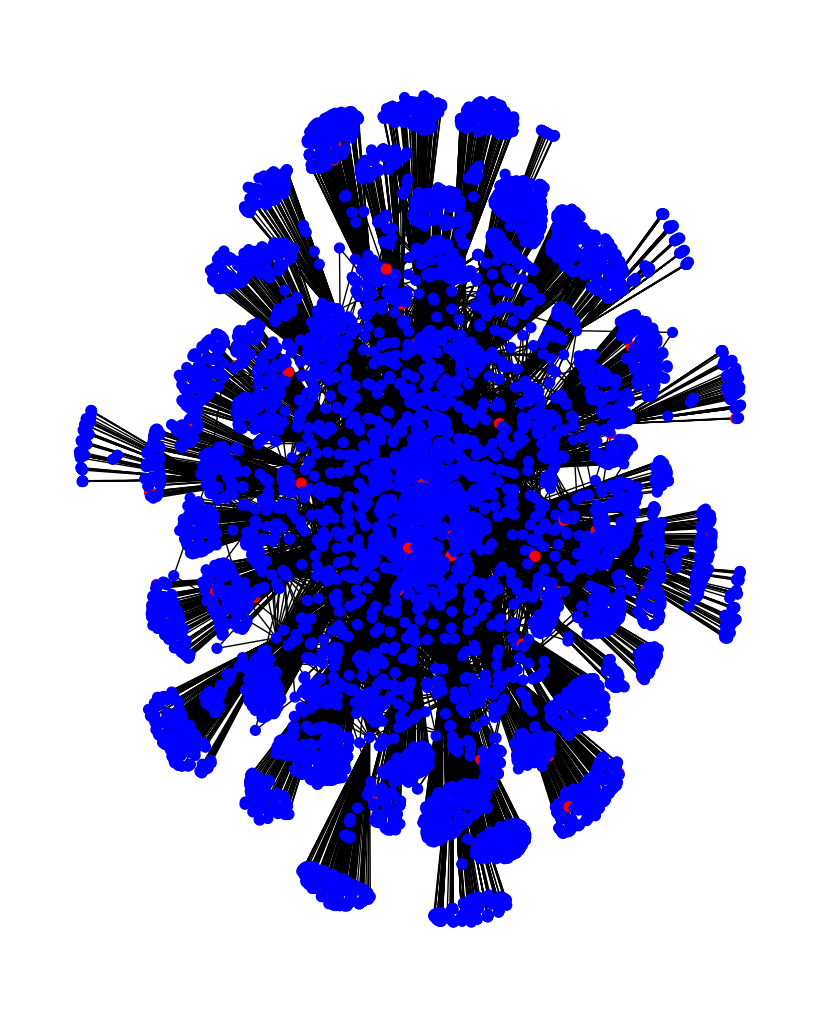

In [127]:
pos = net.spring_layout(G, seed=648)  # Seed layout for reproducible node positions
plt.figure(figsize=(8,10))
net.draw(G, pos,node_color=color_list, node_size=50)
plt.show()

#### **4.1 Functions for Island method**

Here we create the functions that we will use later to examine the islands in our projected graphs

In [128]:
def trim_edges(g, weight=1):
    g2 = net.Graph()
    for f,to, edata in g.edges(data=True):
        
        if edata['weight'] > weight:
            g2.add_edge(f,to,weight=edata['weight'])
    return g2

In [129]:
def island_method(g,iterations=5):
    weights = [edata['weight'] for f, to , edata in g.edges(data=True)]



    mn = int(min(weights))
    mx = int(max(weights))

    step = int((mx-mn)/iterations)

    return[[threshold,trim_edges(g,threshold)] for threshold in range(mn,mx,step)]
    

##### **5. Unique Users Projections**

We start by creating unweighted and weighted projections for the Users in the network. This projection represents the users that have the most movies in common with other users, since the edges in this projection would represent when two users have watched the same movie.

In [130]:
U1 = bipartite.projected_graph(G,prop_names)
U2 = bipartite.weighted_projected_graph(G,word_tokens)

In [ ]:
users_unweighted = pd.DataFrame([{'user':user,'degree':U1.degree(user)} for user in unique_users]).sort_values(by='degree', ascending=False).reset_index(drop=True)
users_weighted = pd.DataFrame([{'user':user,'degree':U2.degree(user,weight='weight')} for user in unique_users]).sort_values(by='degree', ascending=False).reset_index(drop=True)

#### **5.1 Top 10 Users based on number of connections**
Here we see the Top 10 users based on the number of connections they have with other users in the network that watched the same titles.

In [ ]:
top_10 = users_unweighted.iloc[:10,:].copy().sort_values(by='degree')
top_10['user_cat'] = pd.Categorical(top_10.user, categories=pd.unique(top_10.user))

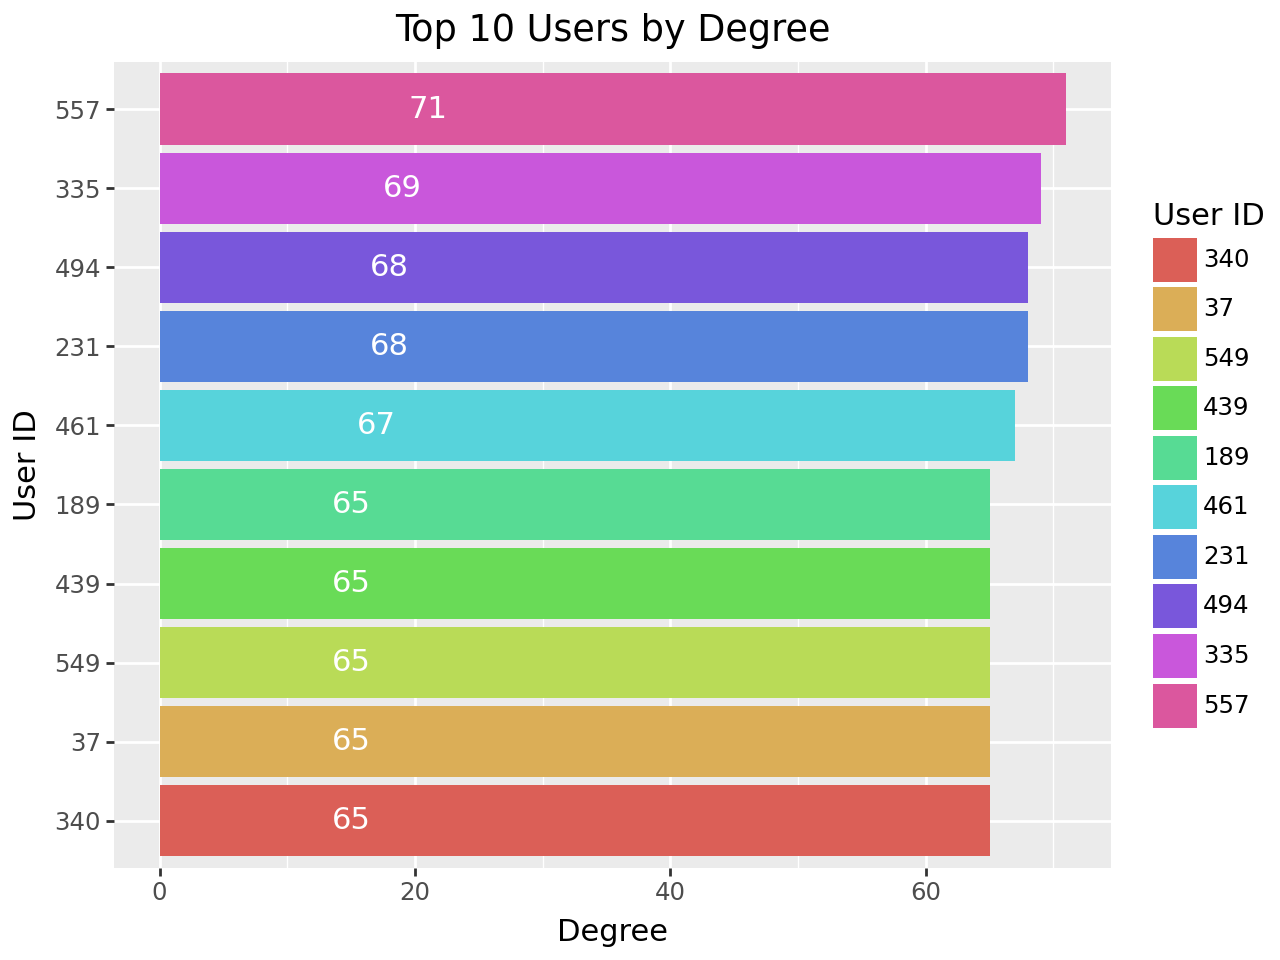

In [ ]:
(
    ggplot(top_10)
    + aes(x='user_cat', y='degree', fill='user_cat')
    + geom_bar(stat='identity')
    + coord_flip()
    + labs(x='User ID', y='Degree', fill='User ID',title='Top 10 Users by Degree')
    + geom_text(aes(label='degree'),nudge_y=-50, color='white')
)

#### **5.2 Top Users based on weighted connections**

Here we see the Top 10 users based on the number of connections they have with other users in the network that watched the same titles.

In [ ]:
top_10 = users_weighted.iloc[:10,:].copy().sort_values(by='degree')
top_10['user_cat'] = pd.Categorical(top_10.user, categories=pd.unique(top_10.user))

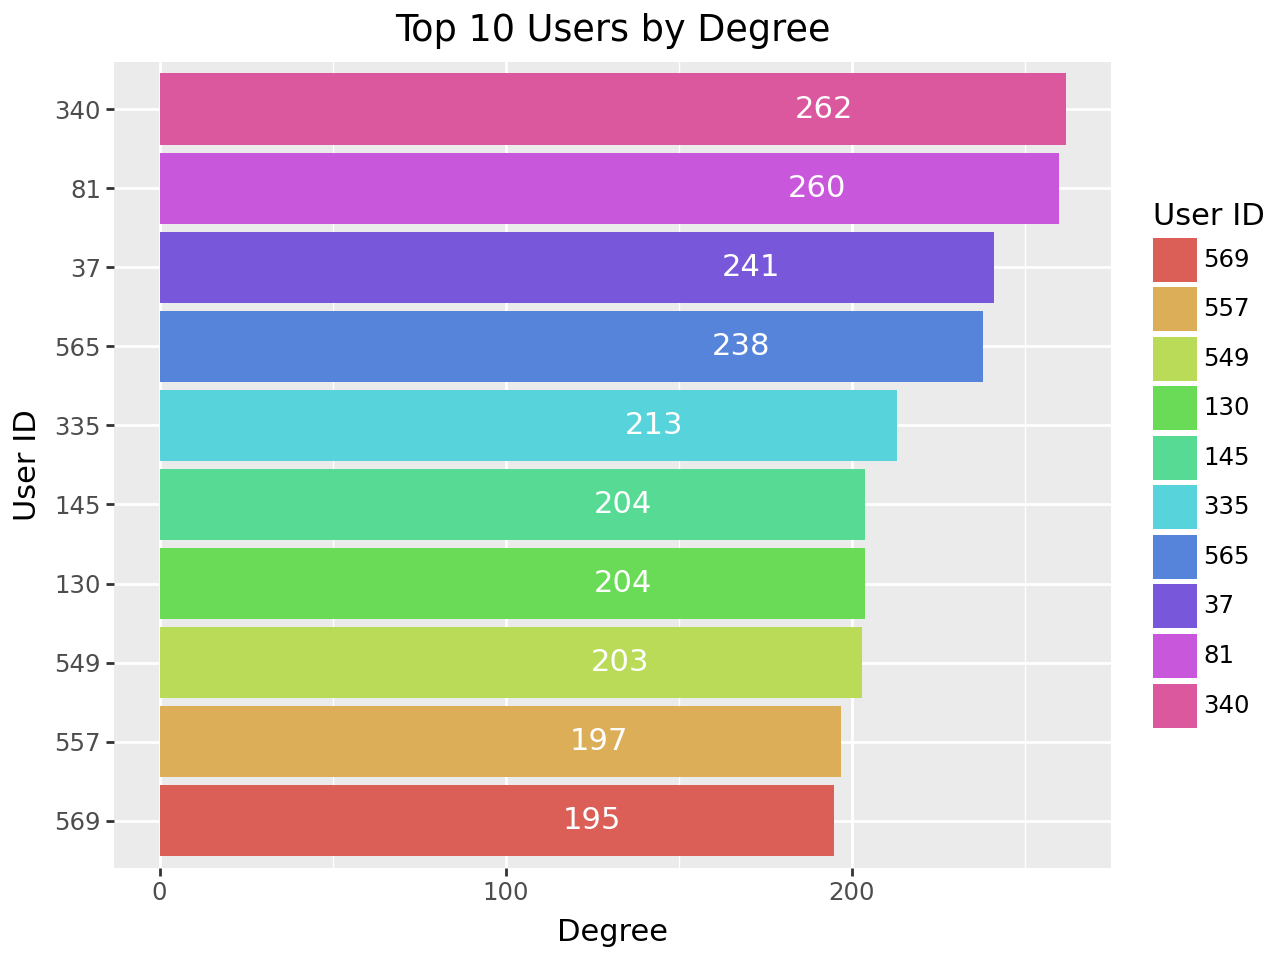

In [ ]:
(
    ggplot(top_10)
    + aes(x='user_cat', y='degree', fill='user_cat')
    + geom_bar(stat='identity')
    + coord_flip()
    + labs(x='User ID', y='Degree', fill='User ID',title='Top 10 Users by Degree')
    + geom_text(aes(label='degree'),nudge_y=-70, color='white')
)

#### **5.3 Plot of unweighted user projection**

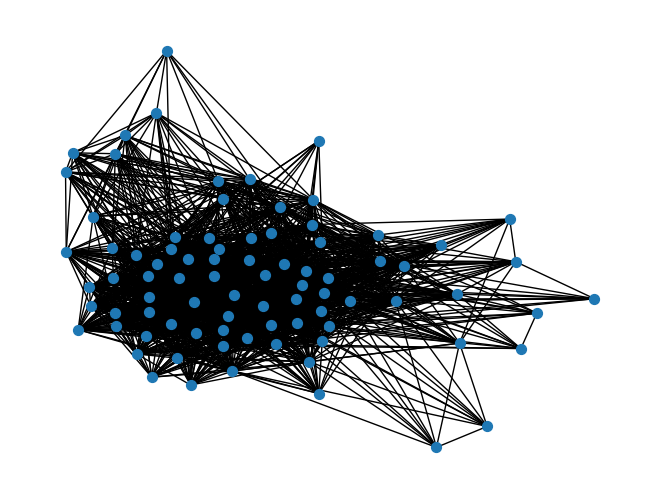

In [ ]:
pos = net.spring_layout(U1, seed=648)  # Seed layout for reproducible node positions
net.draw(U1,pos,node_size=50)
plt.show()

#### 5.4 **Plot of weighted user projection**

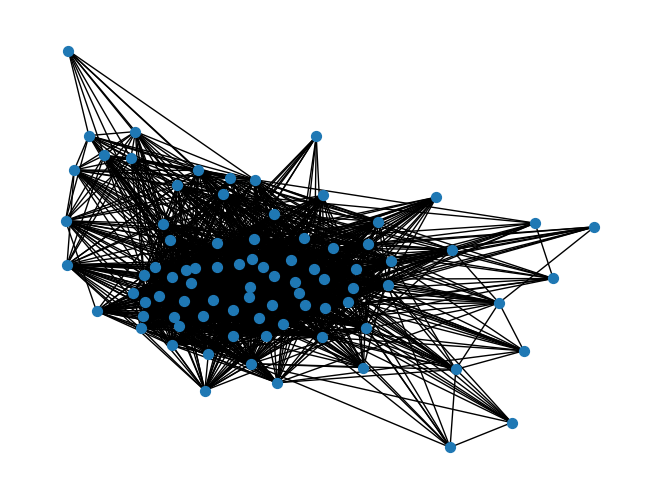

In [ ]:
pos = net.spring_layout(U2, seed=648)  # Seed layout for reproducible node positions
net.draw(U2,pos,node_size=50)
plt.show()

#### **5.5 Island method**


We begin by running the island method on our Graph to identify specific sets of islandas in the network 

In [ ]:
cc = U2.subgraph(next(net.connected_components(U2))).copy()

In [ ]:
islands = island_method(cc)

In [ ]:
for i in islands:
    #print(i[0],len(i[1]))
    print(i[0],len(i[1]),len(U.subgraph(next(net.connected_components(i[1])))))

1 74 74
3 57 48
5 37 34
7 21 5
9 13 13
11 7 7
13 2 2


#### **5.5.1 - Island #1**

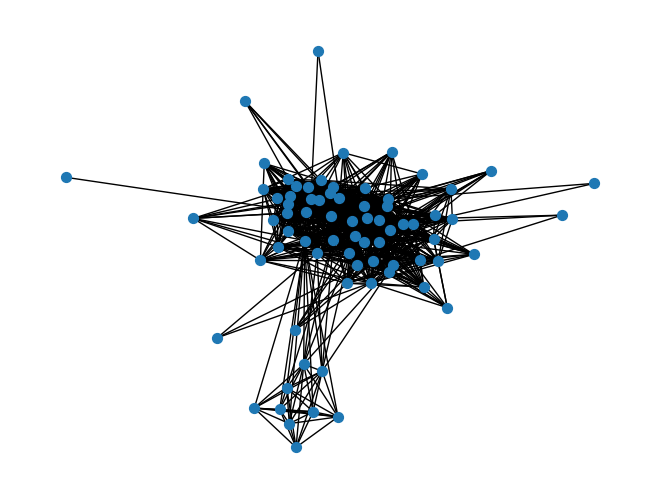

In [ ]:
pos = net.spring_layout(islands[0][1], seed=648)  # Seed layout for reproducible node positions
net.draw(islands[0][1],pos,node_size=50)
plt.show()
#net.draw(islands[0][1])

#### **5.5.2 - Island #2**

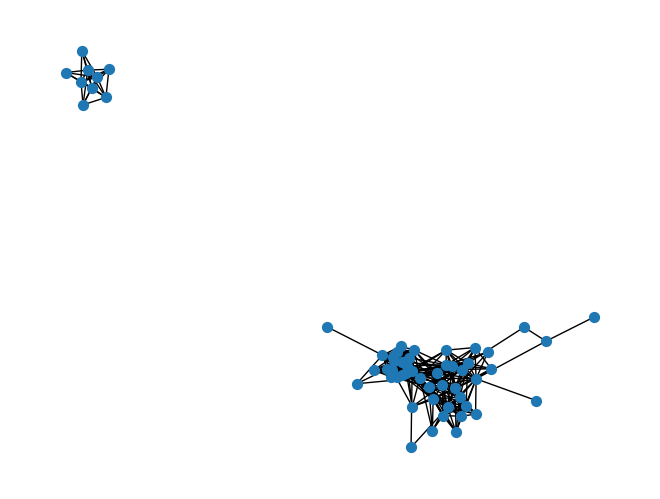

In [ ]:
pos = net.spring_layout(islands[1][1], seed=648)  # Seed layout for reproducible node positions
net.draw(islands[1][1],pos,node_size=50)
plt.show()
#net.draw(islands[0][1])

#### **5.5.3 - Island #3**

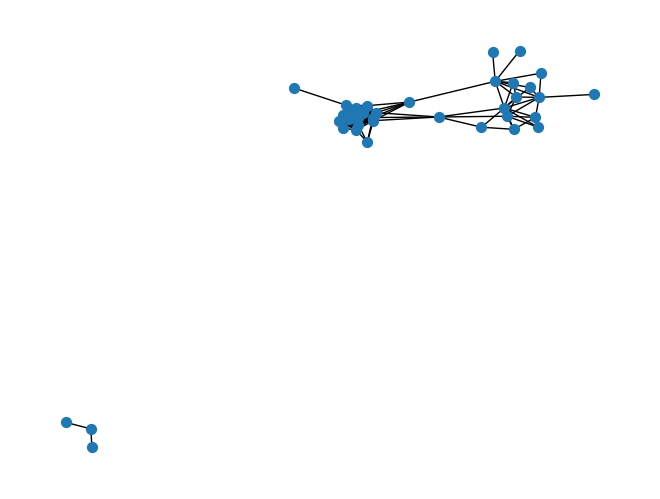

In [ ]:
pos = net.spring_layout(islands[2][1], seed=648)  # Seed layout for reproducible node positions
net.draw(islands[2][1],pos,node_size=50)
plt.show()
#net.draw(islands[0][1])

#### **5.5.4 - Island #4**

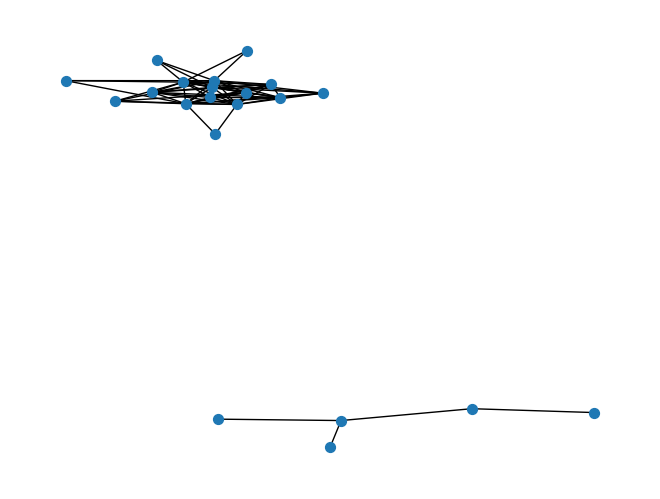

In [ ]:
pos = net.spring_layout(islands[3][1], seed=648)  # Seed layout for reproducible node positions
net.draw(islands[3][1],pos,node_size=50)
plt.show()
#net.draw(islands[0][1])

#### **5.5.5 - Island #5**

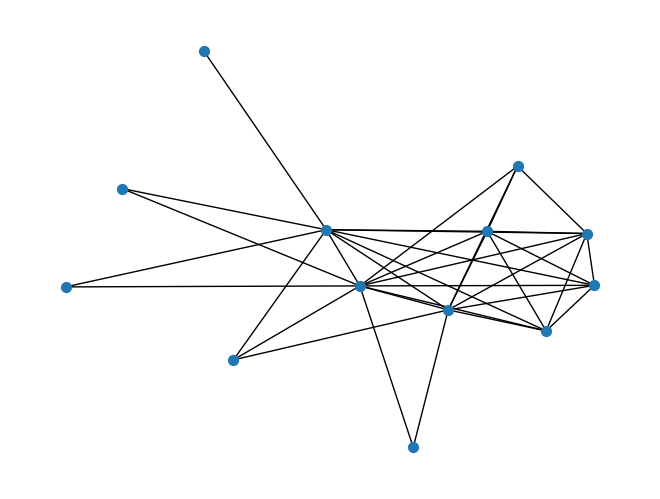

In [ ]:
pos = net.spring_layout(islands[4][1], seed=648)  # Seed layout for reproducible node positions
net.draw(islands[4][1],pos,node_size=50)
plt.show()
#net.draw(islands[0][1])


#### **5.5.6 - Island #6**


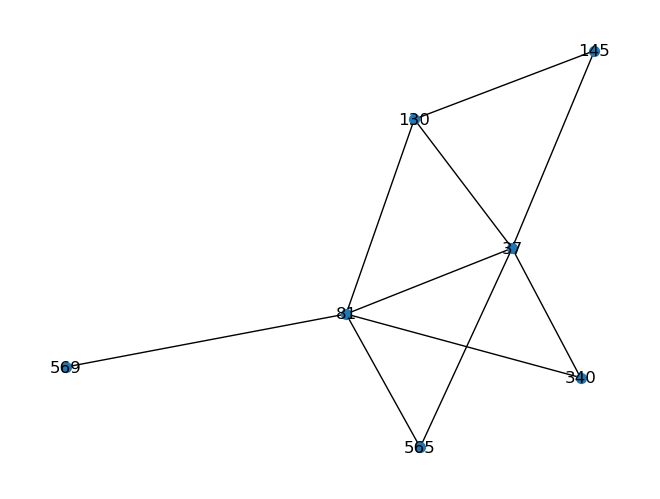

In [ ]:
pos = net.spring_layout(islands[5][1], seed=648)  # Seed layout for reproducible node positions
net.draw(islands[5][1],pos,node_size=50, with_labels=True)
plt.show()
#net.draw(islands[0][1])


#### **5.5.7 - Island #7**

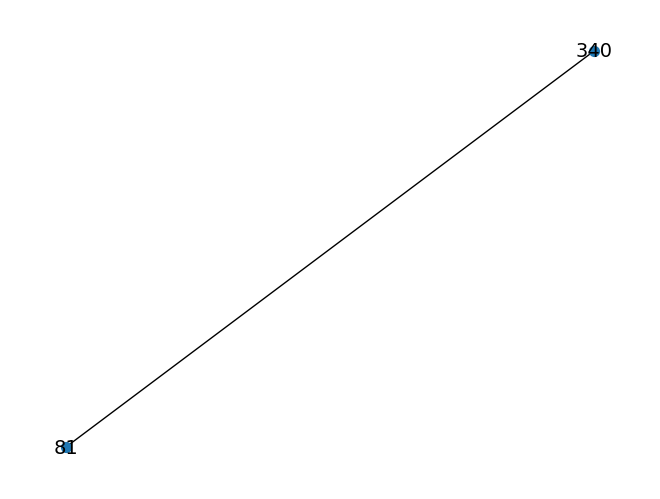

In [ ]:
pos = net.spring_layout(islands[6][1], seed=648)  # Seed layout for reproducible node positions
net.draw(islands[6][1],pos,node_size=50,with_labels=True,font_size=14)
plt.show()
#net.draw(islands[0][1])

In [ ]:
temp_df.loc[temp_df['userId'] == 569]

,title,userId,rating
88199,GoldenEye (1995),569,4.0
88200,"Usual Suspects, The (1995)",569,3.0
88201,Batman Forever (1995),569,5.0
88202,Die Hard: With a Vengeance (1995),569,5.0
88204,Dumb & Dumber (Dumb and Dumber) (1994),569,3.0
88205,Pulp Fiction (1994),569,5.0
88206,Stargate (1994),569,4.0
88207,Star Trek: Generations (1994),569,5.0
88208,Ace Ventura: Pet Detective (1994),569,4.0
88210,Forrest Gump (1994),569,3.0


#### **6. Movie Titles projection**

Next we are interested in looking at the projections of the bipartite network based on the movie titles.

In [ ]:
T1 = bipartite.projected_graph(G,unique_titles)
T2 = bipartite.weighted_projected_graph(G,unique_titles)


In [ ]:
titles_unweighted = pd.DataFrame([{'title':title,'degree':T1.degree(title)} for title in unique_titles]).sort_values(by='degree', ascending=False).reset_index(drop=True)
titles_weighted = pd.DataFrame([{'title':title,'degree':T2.degree(title,weight='weight')} for title in unique_titles]).sort_values(by='degree', ascending=False).reset_index(drop=True)

#### **6.1 Ranked movie titles (unweighted projection)**



##### **6.1.1 Top 10**
Here we see the Top 10 movie titles based on the number of users that watched that title. The list of top movies aren't really too suprising

In [ ]:
top_10 = titles_unweighted.iloc[:10,:].copy().sort_values(by='degree')

In [ ]:
top_10.iloc[:,:2].sort_values(by='degree', ascending=False)

,title,degree
0,Forrest Gump (1994),152
1,"Shawshank Redemption, The (1994)",151
2,Pulp Fiction (1994),150
3,"Silence of the Lambs, The (1991)",148
4,Braveheart (1995),148
5,Toy Story (1995),148
6,Schindler's List (1993),146
7,Terminator 2: Judgment Day (1991),142
8,"Usual Suspects, The (1995)",137
9,Twelve Monkeys (a.k.a. 12 Monkeys) (1995),135



##### **6.1.2 Bottom 10**
Here we see the bottom 10 movie titles based on the number of users that watched that title.

In [ ]:
bottom_10 = titles_unweighted.iloc[-10:,:].copy().sort_values(by='degree', ascending=False)

In [ ]:
bottom_10.iloc[:,:2].sort_values(by='degree', ascending=False)

,title,degree
144,"Dark Knight Rises, The (2012)",60
145,"Good, the Bad and the Ugly, The (Buono, il bru...",60
146,Phenomenon (1996),59
147,Life Is Beautiful (La Vita è bella) (1997),58
148,"Time to Kill, A (1996)",57
149,City of God (Cidade de Deus) (2002),55
150,Almost Famous (2000),55
151,Avatar (2009),51
152,Harry Potter and the Half-Blood Prince (2009),49
153,Executive Decision (1996),47


I'm somewhat suprised to see the Harry Potter movie and Dark Knight Rises included in the list of the bottom 10 movies.

#### **6.2 Top 10 movie title (weighted projection)**

Here we see the Top 10 movie titles based on the number of connections and the rating that they received.

#### **6.2.1 Top 10**

In [ ]:
top_10 = titles_weighted.iloc[:10,:].copy().sort_values(by='degree')

In [ ]:
top_10.sort_values(by='degree', ascending=False)

,title,degree
0,"Shawshank Redemption, The (1994)",1640
1,Pulp Fiction (1994),1446
2,Forrest Gump (1994),1437
3,Braveheart (1995),1314
4,"Silence of the Lambs, The (1991)",1238
5,Apollo 13 (1995),1107
6,Batman (1989),1052
7,Dances with Wolves (1990),1041
8,Schindler's List (1993),990
9,Ace Ventura: Pet Detective (1994),988


When we consider the ratings that the movies received, we see a list of movies that one would consider to be a list of critically acclaimed movies.

#### **6.2.2 Bottom 10**

In [ ]:
bottom_10 = titles_weighted.iloc[-10:,:].copy().sort_values(by='degree')

In [ ]:
bottom_10.sort_values(by='degree', ascending=False)

,title,degree
144,Kill Bill: Vol. 1 (2003),129
145,City of God (Cidade de Deus) (2002),120
146,Butch Cassidy and the Sundance Kid (1969),120
147,"Good, the Bad and the Ugly, The (Buono, il bru...",116
148,Harry Potter and the Half-Blood Prince (2009),116
149,Armageddon (1998),115
150,Mystery Science Theater 3000: The Movie (1996),115
151,Avatar (2009),112
152,Life Is Beautiful (La Vita è bella) (1997),111
153,Almost Famous (2000),74


#### **6.3 Plot of movie connections (unweighted)**

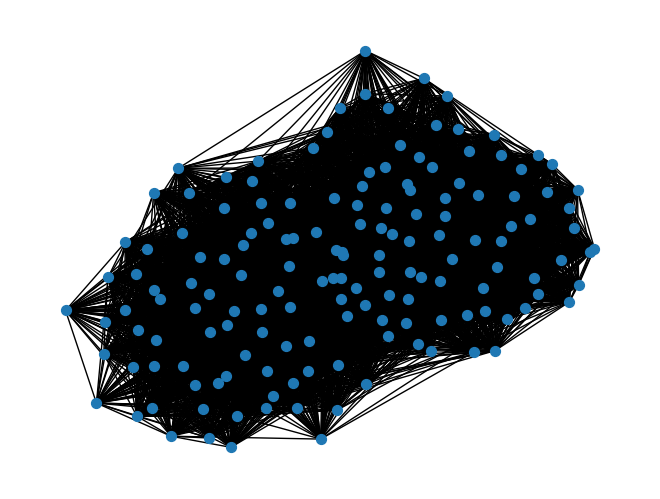

In [ ]:
pos = net.spring_layout(T1, seed=648)  # Seed layout for reproducible node positions
net.draw(T1,pos,node_size=50)
plt.show()

#### **6.4 Plot of movie connections (weighted projection)**

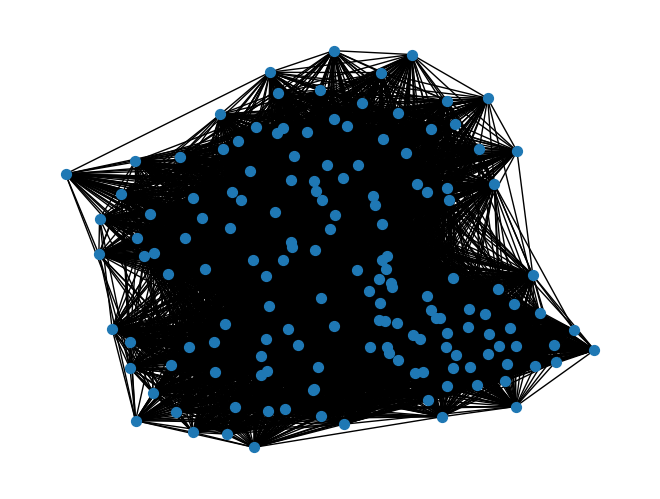

In [ ]:
pos = net.spring_layout(T2, seed=648)  # Seed layout for reproducible node positions
net.draw(T1,pos,node_size=50)
plt.show()

#### **6.5 Island method**


We begin by running the island method on our Graph to identify specific sets of islandas in the network 

In [ ]:
cc = T2.subgraph(next(net.connected_components(T2))).copy()

In [ ]:
islands = island_method(cc)

In [ ]:
for i in islands:
    #print(i[0],len(i[1]))
    print(i[0],len(i[1]),len(T2.subgraph(next(net.connected_components(i[1])))))

1 154 154
10 92 92
19 40 37
28 17 17
37 4 4


#### **6.5.1 - Island #1**

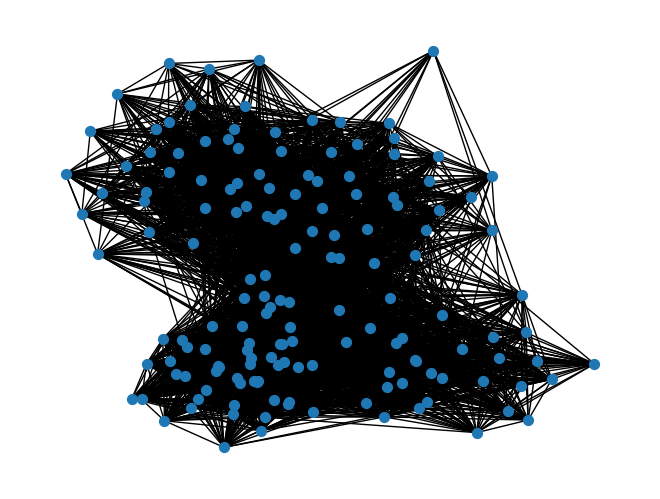

In [ ]:
pos = net.spring_layout(islands[0][1], seed=648)  # Seed layout for reproducible node positions
net.draw(islands[0][1],pos,node_size=50)
plt.show()
#net.draw(islands[0][1])

#### **6.5.2 - Island #2**

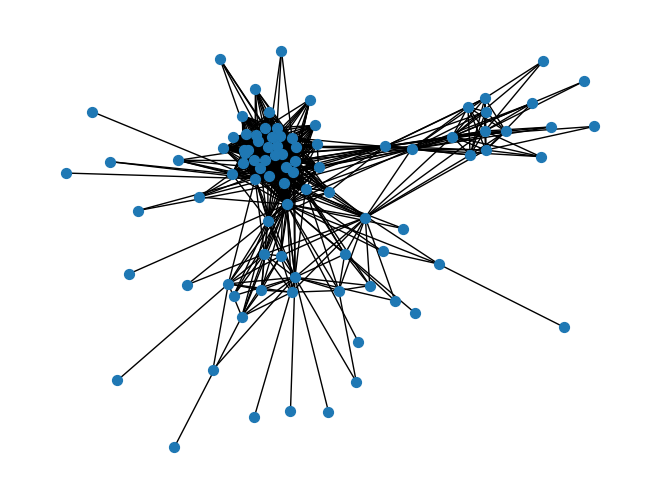

In [ ]:
pos = net.spring_layout(islands[1][1], seed=648)  # Seed layout for reproducible node positions
net.draw(islands[1][1],pos,node_size=50)
plt.show()
#net.draw(islands[1][1])

#### **6.5.3 - Island #3**

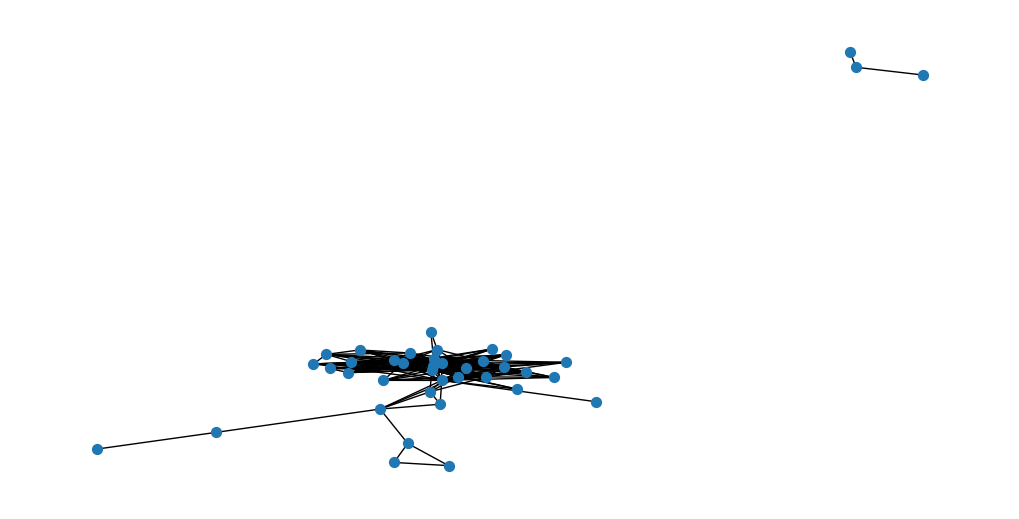

In [ ]:
plt.figure(figsize=(10,5))
pos = net.spring_layout(islands[2][1], seed=648)  # Seed layout for reproducible node positions
net.draw(islands[2][1],pos,node_size=50)
plt.show()
#net.draw(islands[2][1])

#### **6.5.4 - Island #4**

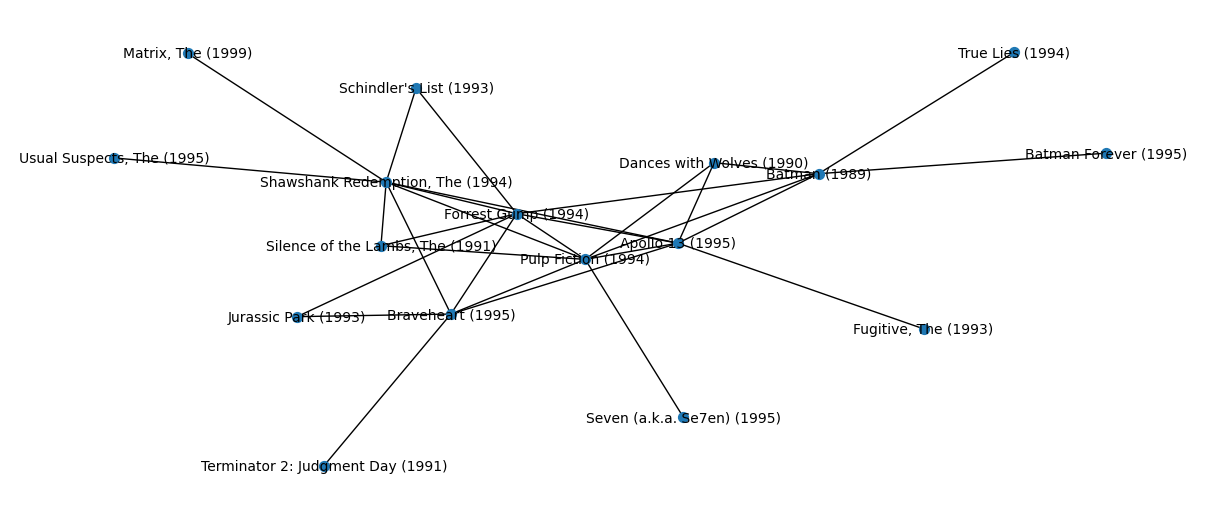

In [ ]:
plt.figure(figsize=(12,5))
pos = net.spring_layout(islands[3][1], seed=648)  # Seed layout for reproducible node positions
net.draw(islands[3][1],pos,node_size=50,with_labels=True,font_size=10)
plt.show()
#net.draw(islands[3][1])

#### **6.5.5 - Island #5**

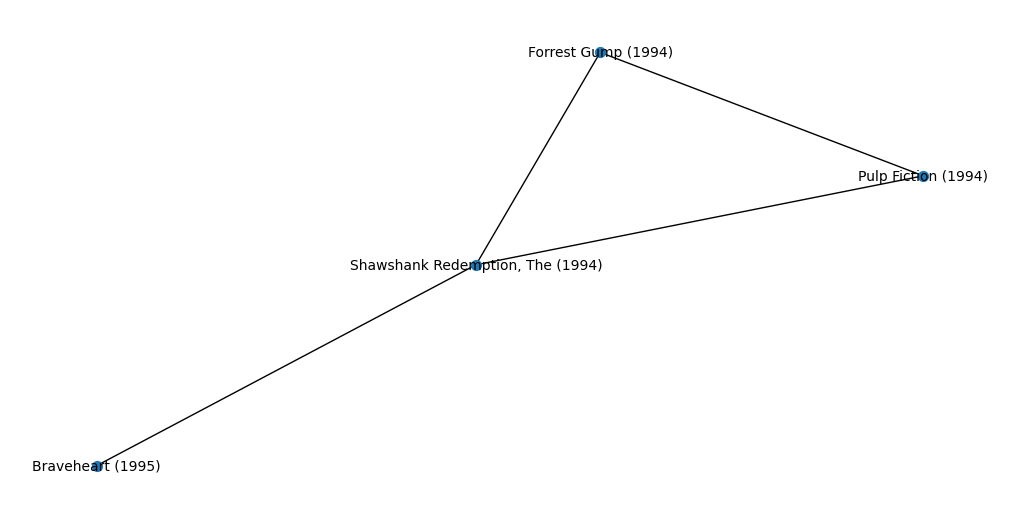

In [ ]:
plt.figure(figsize=(10,5))
pos = net.spring_layout(islands[4][1], seed=648)  # Seed layout for reproducible node positions
net.draw(islands[4][1],pos,node_size=50,with_labels=True,font_size=10)
plt.show()
#net.draw(islands[4][1])

#### **7. Conclusion**



In this network, we find similar results as when we analyzed the network based on the eigenvector and degree centrality measures. The top movies in the network are titles that we would expect based on our own familiarity with movies. Looking at the Island network with weight of 34 (meaning there are at least 34 connections), we find that the network consists only of **Forrest Gump, Pulp Fiction, Shawshank Redemption and Braveheart**. Three of these four films together create a closed triad, with Shawshank Redemption serving as a connector to the movie Braveheart. From a personal perspective this fits into my own movie watching reality. I've seen Forrest Gump, Pulp Fiction and Shawshank Redemption; but I have not seen Bravehart. 